In [ ]:

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math


In [ ]:
print(tf.__version__)


2.15.0


[LeNet-5] Modified Architecture
ConvNet --> ConvNet --> BatchNorm --> Pool --> (Dropout) --> ConvNet --> ConvNet --> BatchNorm --> Pool --> (Dropout) --> (Flatten) --> FullyConnected --> BatchNorm --> FullyConnected --> BatchNorm --> FullyConnected --> BatchNorm --> (Dropout) --> Softmax

Results
Epochs: 30.
Loss: 0.0144
Train Accuracy: 0.9973
Validation Loss: 0.0249
Validation Accuracy: 0.9963
Highest Dev Set Accuracy Obtained - 99.63%



In [ ]:
def LeNet5v2(input_shape = (32, 32, 1), classes = 10):
    """
    Implementation of a modified LeNet-5.
    Only those layers with learnable parameters are counted in the layer numbering.

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    model = Sequential([

    # Layer 1
    Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), kernel_regularizer=l2(0.0005), name = 'convolution_1'),

    # Layer 2
    Conv2D(filters = 32, kernel_size = 5, strides = 1, name = 'convolution_2', use_bias=False),

    # Layer 3
    BatchNormalization(name = 'batchnorm_1'),

    # -------------------------------- #
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
    Dropout(0.25, name = 'dropout_1'),
    # -------------------------------- #

    # Layer 3
    Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005), name = 'convolution_3'),

    # Layer 4
    Conv2D(filters = 64, kernel_size = 3, strides = 1, name = 'convolution_4', use_bias=False),

    # Layer 5
    BatchNormalization(name = 'batchnorm_2'),

    # -------------------------------- #
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
    Dropout(0.25, name = 'dropout_2'),
    Flatten(name = 'flatten'),
    # -------------------------------- #

    # Layer 6
    Dense(units = 256, name = 'fully_connected_1', use_bias=False),

    # Layer 7
    BatchNormalization(name = 'batchnorm_3'),

    # -------------------------------- #
    Activation("relu"),
    # -------------------------------- #

    # Layer 8
    Dense(units = 128, name = 'fully_connected_2', use_bias=False),

    # Layer 9
    BatchNormalization(name = 'batchnorm_4'),

    # -------------------------------- #
    Activation("relu"),
    # -------------------------------- #

    # Layer 10
    Dense(units = 84, name = 'fully_connected_3', use_bias=False),

    # Layer 11
    BatchNormalization(name = 'batchnorm_5'),

    # -------------------------------- #
    Activation("relu"),
    Dropout(0.25, name = 'dropout_3'),
    # -------------------------------- #

    # Output
    Dense(units = 10, activation = 'softmax', name = 'output')

    ])

    model._name = 'LeNet5v2'

    return model


In [ ]:
LeNet5Model = LeNet5v2(input_shape = (32, 32, 1), classes = 10)


In [ ]:
LeNet5Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
LeNet5Model.summary()


Model: "LeNet5v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolution_1 (Conv2D)      (None, 28, 28, 32)        832       
                                                                 
 convolution_2 (Conv2D)      (None, 24, 24, 32)        25600     
                                                                 
 batchnorm_1 (BatchNormaliz  (None, 24, 24, 32)        128       
 ation)                                                          
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 12, 12, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                          

# Kaggle Data Processing

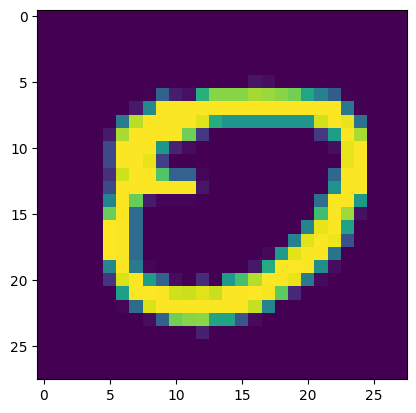

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape and preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Split the training set into training and cross-validation sets
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.05, random_state=random_seed)

plt.imshow(X_train[0][:,:,0])


In [ ]:

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

mean_px = X_val.mean().astype(np.float32)
std_px = X_val.std().astype(np.float32)
X_val = (X_val - mean_px)/(std_px)

mean_px = X_test.mean().astype(np.float32)
std_px = X_test.std().astype(np.float32)
X_test = (X_test - mean_px)/(std_px)

# One-hot encoding the labels
Y_train = to_categorical(Y_train, num_classes = 10)
Y_val = to_categorical(Y_val, num_classes = 10)


In [ ]:

# By using the image generator, we are not generating new data. We are only replacing the exisiting images.

datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
#Variable Learning Rate

variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

In [ ]:
history = LeNet5Model.fit(X_train, Y_train, epochs = 30, batch_size = 64, callbacks = [variable_learning_rate], validation_data = (X_val,Y_val))


Epoch 1/30
891/891 [==============================] - 20s 10ms/step - loss: 0.2127 - accuracy: 0.9461 - val_loss: 0.0639 - val_accuracy: 0.9853 - lr: 0.0010
Epoch 2/30
891/891 [==============================] - 8s 9ms/step - loss: 0.0838 - accuracy: 0.9802 - val_loss: 0.0582 - val_accuracy: 0.9873 - lr: 0.0010
Epoch 3/30
891/891 [==============================] - 9s 10ms/step - loss: 0.0657 - accuracy: 0.9849 - val_loss: 0.0487 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 4/30
891/891 [==============================] - 8s 9ms/step - loss: 0.0586 - accuracy: 0.9856 - val_loss: 0.0353 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 5/30
891/891 [==============================] - 9s 10ms/step - loss: 0.0500 - accuracy: 0.9878 - val_loss: 0.0565 - val_accuracy: 0.9863 - lr: 0.0010
Epoch 6/30
891/891 [==============================] - 7s 8ms/step - loss: 0.0464 - accuracy: 0.9886 - val_loss: 0.0411 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 7/30
891/891 [==============================] - 10s 11ms/ste

<Figure size 640x480 with 0 Axes>

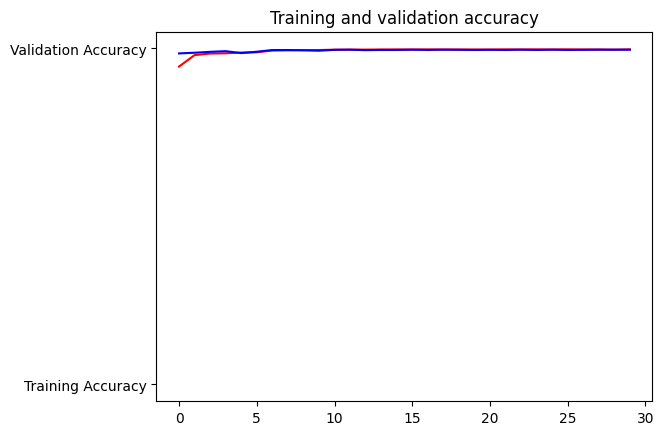

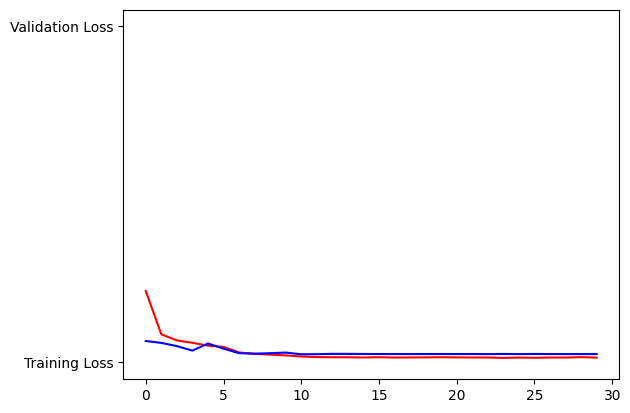

<Figure size 640x480 with 0 Axes>

In [ ]:

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [ ]:

results = LeNet5Model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

313/313 [==============================] - 2s 4ms/step


In [ ]:

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("LeNetv2.csv",index=False)

In [ ]:
submission

,ImageId,Label
0,1,7.0
1,2,2.0
2,3,1.0
3,4,0.0
4,5,4.0
...,...,...
27995,27996,NaN
27996,27997,NaN
27997,27998,NaN
27998,27999,NaN


313/313 [==============================] - 3s 9ms/step


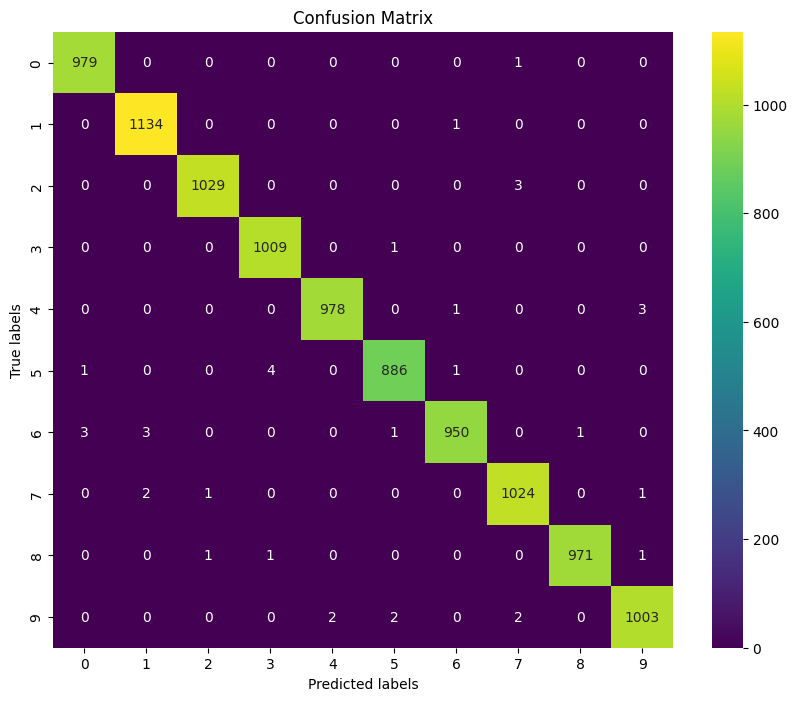

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted labels for the test set
results = LeNet5Model.predict(X_test)
predicted_labels = np.argmax(results, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [29]:
def display_input_output_images(input_data, output_labels, model, num_images=5):
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(input_data[i].reshape(32, 32), cmap='gray')  # Reshape to (32, 32) for display
        plt.axis('off')
        plt.title(f"Input: {output_labels[i]}")

        plt.subplot(2, num_images, i + 1 + num_images)
        input_image = input_data[i].reshape(1, 32, 32, 1)  # Reshape the image to (1, 32, 32, 1)
        predicted_output = model.predict(input_image)
        predicted_label = np.argmax(predicted_output)
        plt.text(0.5, 0.5, f"Predicted: {predicted_label}", ha='center', fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 33ms/step


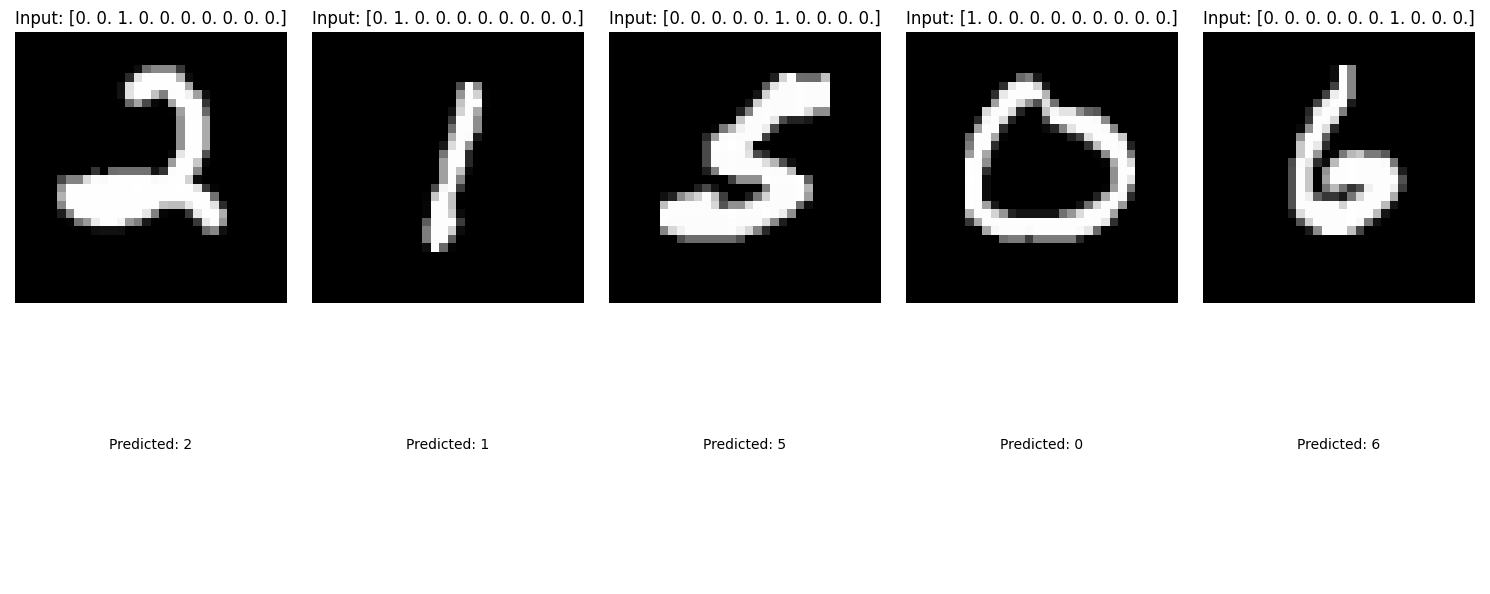

In [30]:
display_input_output_images(X_val, Y_val, LeNet5Model)